# Table of Content

# 0-General
[Back to Table of Content](#table-of-content)

# Exploring Socioeconomic and Health Outcomes in Children and Families Participating in the Kneipp Intervention

## Introduction
[Back to Table of Content](#table-of-content)

The Kneipp intervention, widely practiced in kindergartens across Germany, promotes holistic health and wellness in children through natural water applications, exercise, nutrition, and overall lifestyle balance. However, the broader socioeconomic characteristics and self-reported health outcomes of the children and their families remain underexplored. This analysis focuses on family-reported socioeconomic background and common cold-related outcomes in families participating in the Kneipp intervention.


## Objective
[Back to Table of Content](#table-of-content)

Our objective is to assess the socioeconomic and family characteristics as well as the health-related outcomes, such as incidence of common colds, reported by parents in kindergartens participating in the Kneipp intervention. Specifically, we aim to:

1. Explore socioeconomic factors such as parental education, household income, and time spent outdoors by the children.
2. Examine the health outcomes related to common colds, including baseline and follow-up comparisons.
3. Compare the outcomes between the Kneipp group and the control group.


## Analysis Steps
[Back to Table of Content](#table-of-content)

1. **Data Preprocessing:** This involves filtering out irrelevant entries and preparing the dataset for analysis by excluding siblings and focusing on the target child of interest. Time points are cleaned, and groups are assigned based on kindergarten participation.
   
2. **In-Depth Exploratory Data Analysis:** A descriptive analysis of the socioeconomic characteristics of families and baseline health conditions is performed. This includes analyzing data on education, household income, outdoor activities, and common cold symptoms. This analysis helps us understand the demographic spread of the participants and provides insights into baseline health conditions before the intervention.
   
3. **Modeling:** Linear mixed-effects models (LMMs) are used to analyze the follow-up health outcomes, controlling for baseline values and random effects such as kindergartens and random pairing. This approach enables a robust comparison of the effect of the Kneipp intervention on health outcomes, separately for male and female participants.
   
4. **Assumptions Testing:** The models’ assumptions are checked for appropriate distribution of residuals, ensuring the models are fit for use. For each health condition, separate models are developed for males and females to assess potential gender-specific differences in the effects of the intervention.


## Data Dictionary
[Back to Table of Content](#table-of-content)

| Variable                   | Description                                                                 | Data Type          |
|----------------------------|-----------------------------------------------------------------------------|--------------------|
| serial_ID                   | Unique identifier for each participant.                                     | Character (chr)    |
| kindergarten_ID             | Identifier for the kindergarten the child attends.                          | Character (chr)    |
| questionnaire_time_point    | Time point for the questionnaire response (e.g., Baseline, Follow-up).      | Character (chr)    |
| CCQ_fever                   | Common cold symptom: Fever.                                                 | Numeric (dbl)      |
| CCQ_chills                  | Common cold symptom: Chills.                                                | Numeric (dbl)      |
| CCQ_muscle_pain             | Common cold symptom: Muscle pain.                                           | Numeric (dbl)      |
| CCQ_watery_eyes             | Common cold symptom: Watery eyes.                                           | Numeric (dbl)      |
| CCQ_runny_nose              | Common cold symptom: Runny nose.                                            | Numeric (dbl)      |
| CCQ_sneezing                | Common cold symptom: Sneezing.                                              | Numeric (dbl)      |
| CCQ_sore_throat             | Common cold symptom: Sore throat.                                           | Numeric (dbl)      |
| CCQ_cough                   | Common cold symptom: Cough.                                                 | Numeric (dbl)      |
| CCQ_chest_pain              | Common cold symptom: Chest pain.                                            | Numeric (dbl)      |
| child_age_months            | Age of the child in months.                                                 | Numeric (dbl)      |
| sleep_duration_weekdays     | Hours of sleep on weekdays.                                                 | Numeric (dbl)      |
| sleep_duration_weekends     | Hours of sleep on weekends.                                                 | Numeric (dbl)      |
| number_adults               | Number of adults in the household.                                          | Numeric (dbl)      |
| number_minors               | Number of children in the household.                                        | Numeric (dbl)      |
| vaccination_status          | Vaccination status (all recommended, some recommended, none).               | Numeric (dbl)      |
| pre_existing_disease        | Whether the child had a pre-existing disease (yes/no).                      | Numeric (dbl)      |
| chronic_disease             | Whether the child has a chronic disease (yes/no).                           | Numeric (dbl)      |
| time_outside                | Time spent outdoors daily (in minutes).                                     | Numeric (dbl)      |
| sport_and_club              | Whether the child participates in sports or clubs (yes/no).                 | Numeric (dbl)      |
| family_status               | Family structure (e.g., married, cohabiting, single parent).                | Numeric (dbl)      |
| education_parent1           | Education level of Parent 1.                                                | Numeric (dbl)      |
| education_parent2           | Education level of Parent 2.                                                | Numeric (dbl)      |
| occupation_parent1          | Occupation of Parent 1 (e.g., employed, student, unemployed).               | Numeric (dbl)      |
| occupation_parent2          | Occupation of Parent 2 (e.g., employed, student, unemployed).               | Numeric (dbl)      |
| household_income            | Household income range (e.g., <500 EUR, 500-1000 EUR).                      | Numeric (dbl)      |


## Acknowledgements
[Back to Table of Content](#table-of-content)

We extend our gratitude to the entire research group of [Prof. Dr. med. Seifert](https://kinderonkologie.charite.de/forschung/ag_seifert/team/) and all participating kindergartens and families for their invaluable contributions to this study. The statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw the development of this notebook.

# Packages
[Back to Table of Content](#table-of-content)

#### Importing required libraries

In [45]:
# List of packages
packages <- c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
              "lubridate", "data.table", "plyr", "janitor", "reshape2",
              "readxl", "mice", "gridExtra", "rlang", "lme4")

In [46]:
# Install packages
install.packages(setdiff(packages, rownames(installed.packages())))

In [47]:
# Load packages without printing
invisible(lapply(packages, library, character.only = TRUE))

In [48]:
# Working path
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp"

In [49]:
# Read in data
sosci <- read_csv(file.path(path, "/data/Sosci.csv"))

Rows: 13360 Columns: 50
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): serial_ID, questionnaire_time_point, kindergarten_ID
dbl (47): zipcode, number_adults, number_minors, age_oldest, age_youngest, f...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1-Data Preprocessing
[Back to Table of Content](#table-of-content)

In [50]:
# Display the first few rows
head(sosci)

serial_ID,questionnaire_time_point,zipcode,number_adults,number_minors,age_oldest,age_youngest,family_status,parent1,parent2,...,CCQ_sore_throat,CCQ_cough,CCQ_chest_pain,abdominal_pain,diarrhea,vomiting,Number_sickdays_last_winter,child_age_months,sleep_duration_weekdays,sleep_duration_weekends
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CGW4K85NWW,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CGW4K85NWW,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CGW4K85NWW,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CGW4K85NWW,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ECMQH4UTAE,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ECMQH4UTAE,Z,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [51]:
# Filter out rows where questionnaire_time_point is 'Z'
sosci <- sosci %>%
  dplyr::filter(questionnaire_time_point != "Z")

We filtered out the 'Z' time point because it was included in the dataset for administrative reasons and does not correspond to any relevant data for analysis.

In [52]:
# Filter out results for child_number = 1 
sosci <- sosci %>%
  dplyr::filter(child_number == 1)

We filtered out the data for child_number = 1 because the parents primarily answered the online questionnaire about the first child.

In [53]:
# Check the unique values in the 'questionnaire_time_point' column to understand the different time points recorded
unique(sosci$questionnaire_time_point)

[1] "V0-2"  "Vx1-2" "Vx2-2" "Vx3-2" "Vx4-2" "Vx6-2" "Vx5-2" "V0"    "Vx"   
[10] "Vx2"   "Vx3"   "Vx4"   "Vx5"   "Vx6"   "Vx1"

The dataset contains several key time points that are crucial for tracking the progress of the study. The V0 time point represents the baseline or initial assessment before any intervention, providing a reference for later comparisons. Following the baseline, V0-2 corresponds to the follow-up assessment immediately after the intervention period, allowing for an evaluation of the intervention's immediate effects. The recurring measurements, starting with Vx1, are periodic baselines taken at regular intervals during the intervention. These time points, such as Vx1, Vx2, and Vx3, represent the first, second, and third periodic baselines, respectively. Each of these baselines has a corresponding follow-up, denoted by Vx1-2, Vx2-2, and Vx3-2, which are used to assess the short-term impact of the intervention.

As the study progresses, additional time points—Vx4, Vx5, and Vx6—serve as further periodic baselines, with Vx4-2, Vx5-2, and Vx6-2 capturing follow-up data to monitor any longer-term effects. This structure allows for a comprehensive understanding of how the intervention influences participants over both short and extended periods.

In [54]:
# Replace 'Vx' with 'Vx1' in the 'questionnaire_time_point' column to standardize the time point labels
sosci <- sosci %>%
  mutate(questionnaire_time_point = str_replace(questionnaire_time_point, "^Vx$", "Vx1"))


In [55]:
# Get the dimensions of the dataset after filtering and cleaning and print it
num_rows <- nrow(sosci)
num_cols <- ncol(sosci)

print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 3100 rows and 50 columns."


In [56]:
# Map the time points to their respective stages
secondary_outcomes_data <- sosci %>%
  mutate(time_point_label = case_when(
    questionnaire_time_point == 'V0' ~ 'Baseline',
    questionnaire_time_point == 'V0-2' ~ 'Follow',
    questionnaire_time_point == 'Vx1' ~ 'Baseline_week1',
    questionnaire_time_point == 'Vx1-2' ~ 'Follow_week1',
    questionnaire_time_point == 'Vx2' ~ 'Baseline_week2',
    questionnaire_time_point == 'Vx2-2' ~ 'Follow_week2',
    questionnaire_time_point == 'Vx3' ~ 'Baseline_week3',
    questionnaire_time_point == 'Vx3-2' ~ 'Follow_week3',
    questionnaire_time_point == 'Vx4' ~ 'Baseline_week4',
    questionnaire_time_point == 'Vx4-2' ~ 'Follow_week4',
    questionnaire_time_point == 'Vx5' ~ 'Baseline_week5',
    questionnaire_time_point == 'Vx5-2' ~ 'Follow_week5',
    questionnaire_time_point == 'Vx6' ~ 'Baseline_week6',
    questionnaire_time_point == 'Vx6-2' ~ 'Follow_week6',
    TRUE ~ questionnaire_time_point
  ))

In [57]:
# Check the unique values in the 'kindergarten_ID' column to understand the different kindergartens
unique(secondary_outcomes_data$kindergarten_ID)

[1] "admin" "MZA1"  "MZA2"  NA      "Admin" "MTB1"  "MTB2"  "MTB3"  "PBB1" 
[10] "PBB2"  "RGB1"  "RGB2"

In [58]:
# Link each kindergarten_ID to its respective group
secondary_outcomes_data <- secondary_outcomes_data %>%
  mutate(group = case_when(
    kindergarten_ID == 'MTB1' ~ 'Kneipp',
    kindergarten_ID == 'MTB2' ~ 'Control',
    kindergarten_ID == 'MTB3' ~ 'Control',
    kindergarten_ID == 'PBB1' ~ 'Kneipp',
    kindergarten_ID == 'PBB2' ~ 'Control',
    kindergarten_ID == 'RGB1' ~ 'Kneipp',
    kindergarten_ID == 'RGB2' ~ 'Control',
    kindergarten_ID == 'MZA1' ~ 'Kneipp',
    kindergarten_ID == 'MZA2' ~ 'Control',
    TRUE ~ 'Unknown'
  ))

In [59]:
# Replace 'Admin' kindergarten IDs based on previous data from the same 'serial_ID' and 'questionnaire_time_point'
secondary_outcomes_data <- secondary_outcomes_data %>%
  group_by(serial_ID, questionnaire_time_point) %>%
  mutate(kindergarten_ID = if_else(kindergarten_ID == 'Admin' & !is.na(lag(kindergarten_ID)),
                                   lag(kindergarten_ID), kindergarten_ID)) %>%
  ungroup()

The kindergarten_ID column contains identifiers for various kindergartens involved in the study. To ensure accurate grouping, each kindergarten_ID was linked to its respective intervention group, where kindergartens such as 'MTB1,' 'PBB1,' 'RGB1,' and 'MZA1' were classified under the 'Kneipp' intervention group, while 'MTB2,' 'MTB3,' 'PBB2,' 'RGB2,' and 'MZA2' were categorized as the 'Control' group. If a kindergarten was assigned the value 'Admin' or 'admin,' which reflects an unknown category or administrative data entry, the previous kindergarten_ID within the same serial_ID and questionnaire_time_point was used to fill in the missing value, ensuring the correct identification of the kindergarten across time points.

In [60]:
# Create the 'pairs' variable
secondary_outcomes_data <- secondary_outcomes_data %>%
  mutate(pairs = case_when(
    kindergarten_ID %in% c('MTB1', 'MTB2', 'MTB3') ~ 'MTB_pair',
    kindergarten_ID %in% c('PBB1', 'PBB2') ~ 'PBB_pair',
    kindergarten_ID %in% c('RGB1', 'RGB2') ~ 'RGB_pair',
    kindergarten_ID %in% c('MZA1', 'MZA2') ~ 'MZA_pair',
    TRUE ~ NA_character_
  ))

We created the 'pairs' variable to group kindergartens based on their similar socioeconomic backgrounds. Each pair consists of one 'Kneipp' and one 'Control' kindergarten, ensuring that the intervention and control groups are balanced in terms of sample size and located in areas with comparable socioeconomic conditions. This pairing structure allows us to control for potential confounding variables related to the socioeconomic environment, ensuring that differences in outcomes can be more accurately attributed to the intervention rather than external factors.

In [61]:
# Define the symptoms and pre-intervention time points
ccq_symptoms <- c('CCQ_fever', 'CCQ_chills', 'CCQ_muscle_pain', 'CCQ_watery_eyes',
                  'CCQ_runny_nose', 'CCQ_sneezing', 'CCQ_sore_throat', 'CCQ_cough', 
                  'CCQ_chest_pain')
pre_intervention_time_points <- c('V0', 'Vx1', 'Vx2', 'Vx3', 'Vx4', 'Vx5', 'Vx6')


In [62]:
# Create a sum score of the CCQ symptoms for each time point
secondary_outcomes_data <- secondary_outcomes_data %>%
  rowwise() %>%
  dplyr::mutate(CCQ_sum_score = sum(c_across(all_of(ccq_symptoms)), na.rm = TRUE)) %>%
  dplyr::ungroup()


In [63]:
# Calculate the average CCQ score over pre-intervention time points
secondary_outcomes_data <- secondary_outcomes_data %>%
  dplyr::group_by(serial_ID) %>%
  dplyr::mutate(CCQ_baseline_score = mean(CCQ_sum_score[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE)) %>%
  dplyr::ungroup()

In [64]:
# Define the other baseline conditions
baseline_conditions <- c('cold_last_winter', 'bronchitis_last_winter', 
                         'lung_inflammation_last_winter', 'antibiotics_last_winter', 
                         'GI_last_winter')

In [65]:
# Calculate the sum score and average for each baseline condition separately, rounding to 1 or 2
secondary_outcomes_data <- secondary_outcomes_data %>%
  dplyr::group_by(serial_ID) %>%
  dplyr::mutate(baseline_cold_last_winter = ifelse(mean(cold_last_winter[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                baseline_bronchitis_last_winter = ifelse(mean(bronchitis_last_winter[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                baseline_lung_inflammation_last_winter = ifelse(mean(lung_inflammation_last_winter[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                baseline_antibiotics_last_winter = ifelse(mean(antibiotics_last_winter[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                baseline_GI_last_winter = ifelse(mean(GI_last_winter[questionnaire_time_point %in% pre_intervention_time_points], na.rm = TRUE) > 1, 2, 1)) %>%
  dplyr::ungroup()

In [66]:
# Define the post-intervention time points
post_intervention_time_points <- c('V0-2', 'Vx1-2', 'Vx2-2', 'Vx3-2', 'Vx4-2', 'Vx5-2', 'Vx6-2')

In [67]:
# Calculate the average CCQ score over post-intervention time points
secondary_outcomes_data <- secondary_outcomes_data %>%
  dplyr::group_by(serial_ID) %>%
  dplyr::mutate(CCQ_followup_score = mean(CCQ_sum_score[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE)) %>%
  dplyr::ungroup()

In [68]:
# Calculate the sum score and average for each follow-up condition separately, rounding to 1 or 2
secondary_outcomes_data <- secondary_outcomes_data %>%
  dplyr::group_by(serial_ID) %>%
  dplyr::mutate(followup_cold_last_winter = ifelse(mean(cold_last_winter[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                followup_bronchitis_last_winter = ifelse(mean(bronchitis_last_winter[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                followup_lung_inflammation_last_winter = ifelse(mean(lung_inflammation_last_winter[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                followup_antibiotics_last_winter = ifelse(mean(antibiotics_last_winter[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE) > 1, 2, 1),
                followup_GI_last_winter = ifelse(mean(GI_last_winter[questionnaire_time_point %in% post_intervention_time_points], na.rm = TRUE) > 1, 2, 1)) %>%
  dplyr::ungroup()

In [69]:
# Define the time points to be removed
time_points_to_remove <- c('Vx1-2', 'Vx2-2', 'Vx3-2', 'Vx4-2', 'Vx5-2', 'Vx6-2', 
                           'Vx1', 'Vx2', 'Vx3', 'Vx4', 'Vx5', 'Vx6')


In [70]:
# Remove the rows with the defined time points
secondary_outcomes_data <- secondary_outcomes_data %>%
  filter(!questionnaire_time_point %in% time_points_to_remove)

# 2-Analyses

## In-Depth Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In [71]:
# Check the number of participants in each population
cat("Number of participants:", n_distinct(secondary_outcomes_data$serial_ID), "\n")


Number of participants: 300 


In [72]:
# Count the number of males and females by the 'group' variable and print it
sex_distribution <- secondary_outcomes_data %>%
  group_by(group, sex) %>%
  dplyr::summarise(count = n(), .groups = 'drop')

print(sex_distribution)

# A tibble: 10 x 3
   group     sex count
   <chr>   <dbl> <int>
 1 Control     1    62
 2 Control     2    49
 3 Control    NA     4
 4 Kneipp      1    52
 5 Kneipp      2    39
 6 Kneipp     NA    14
 7 Unknown     1   128
 8 Unknown     2   124
 9 Unknown     3     1
10 Unknown    NA     3


In [73]:
# Calculate the number of participants in the Control and Kneipp groups
group_distribution <- sex_distribution %>%
  filter(group %in% c("Control", "Kneipp")) %>%
  group_by(group) %>%
  dplyr::summarise(total_participants = sum(count, na.rm = TRUE))

# Display the result
print(group_distribution)

# A tibble: 2 x 2
  group   total_participants
  <chr>                <int>
1 Control                115
2 Kneipp                 105


In [74]:
# Calculate Kneipp stats and print them
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::filter(!is.na(sex) & sex %in% c(1, 2)) %>%  # Filter out unknown or invalid sex values
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(CCQ_followup_score, na.rm = TRUE),
    sd_CCQ = sd(CCQ_followup_score, na.rm = TRUE),
    min_CCQ = ifelse(sum(!is.na(CCQ_followup_score)) > 0, min(CCQ_followup_score, na.rm = TRUE), NA),
    max_CCQ = ifelse(sum(!is.na(CCQ_followup_score)) > 0, max(CCQ_followup_score, na.rm = TRUE), NA),
    .groups = 'drop'  # Ungroup the result to avoid warnings
  )

print(kneipp_stats)

# A tibble: 6 x 7
  group     sex     n mean_CCQ sd_CCQ min_CCQ max_CCQ
  <chr>   <dbl> <int>    <dbl>  <dbl>   <dbl>   <dbl>
1 Control     1    62     9.71   2.46    0       16.7
2 Control     2    49     8.95   1.85    2.25    13.1
3 Kneipp      1    52     9.11   2.47    0       13.9
4 Kneipp      2    39     8.93   1.67    3.4     12.7
5 Unknown     1   128     8.50   3.44    0       16.7
6 Unknown     2   124     7.91   3.16    0       11.7


In this study, we encountered a group of children who were missing a proper group assignment (either "Control" or "Kneipp"). This issue arose because group assignment information was not collected at the beginning of the trial for certain participants. As a result, a significant number of children are categorized as "Unknown" in the dataset. These participants, while contributing valuable data, do not allow for a direct comparison between the intervention and control groups. 

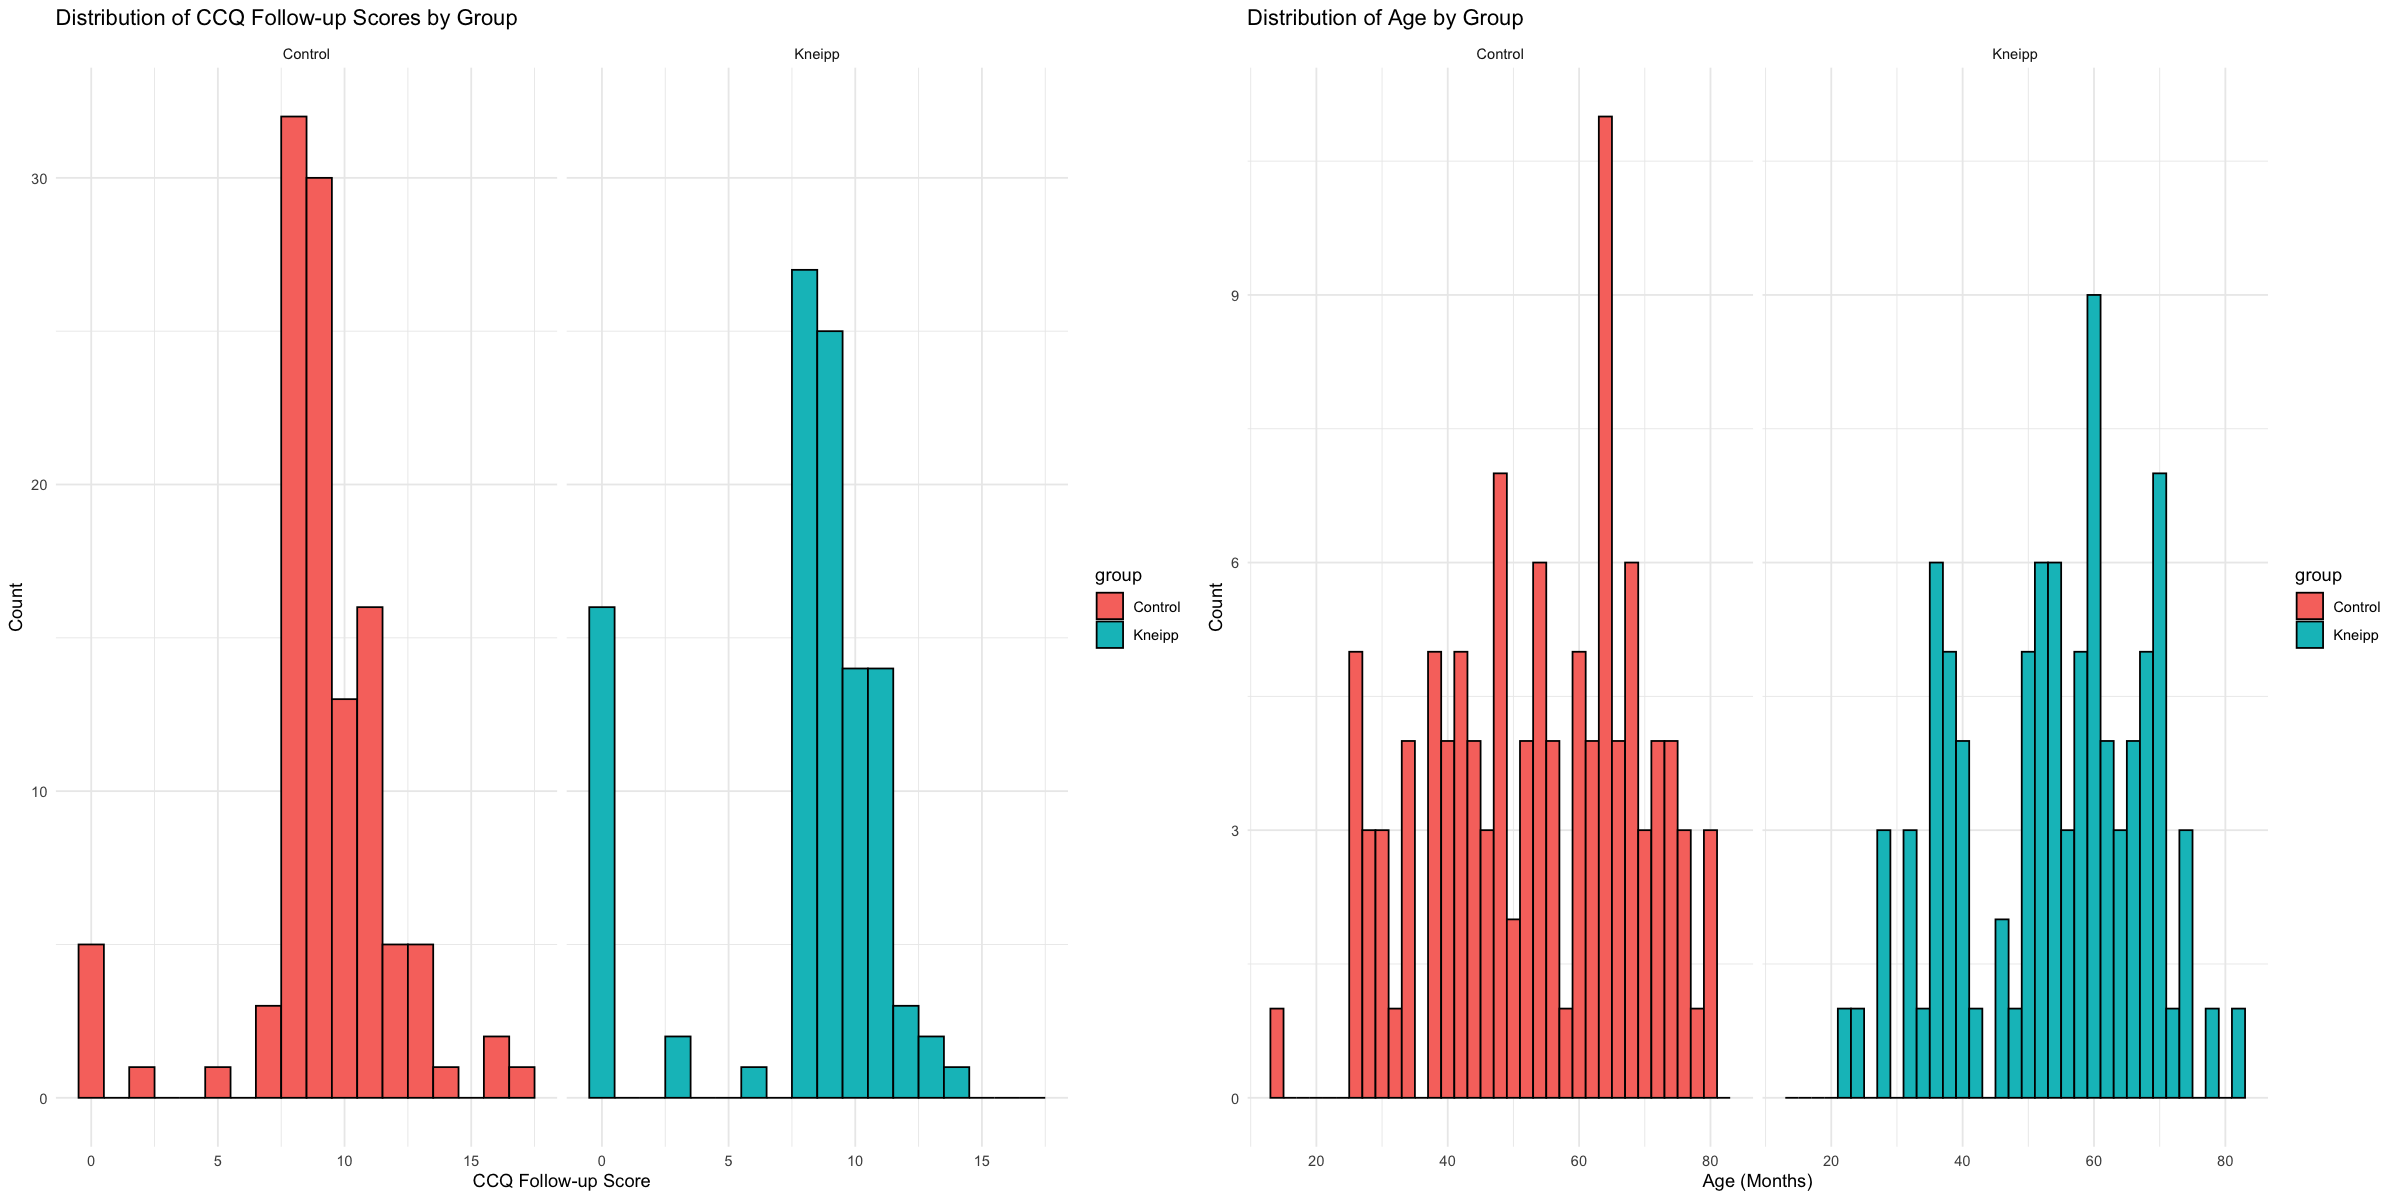

In [75]:
# Increase the width and height of the plot
options(repr.plot.width = 20, repr.plot.height = 10)

# Visualize distribution of CCQ follow-up scores and age by group in a 1-row, 2-column grid
ccq_plot <- ggplot(secondary_outcomes_data %>% filter(group %in% c("Control", "Kneipp")), aes(x = CCQ_followup_score, fill = group)) +
  geom_histogram(binwidth = 1, position = "dodge", color = "black", na.rm = TRUE) +
  facet_wrap(~ group, ncol = 2) +
  labs(title = "Distribution of CCQ Follow-up Scores by Group", x = "CCQ Follow-up Score", y = "Count") +
  theme_minimal()

age_plot <- ggplot(secondary_outcomes_data %>% filter(group %in% c("Control", "Kneipp")), aes(x = child_age_months, fill = group)) +
  geom_histogram(binwidth = 2, position = "dodge", color = "black", na.rm = TRUE) +
  facet_wrap(~ group, ncol = 2) +
  labs(title = "Distribution of Age by Group", x = "Age (Months)", y = "Count") +
  theme_minimal()

# Use gridExtra to display both plots side by side
gridExtra::grid.arrange(ccq_plot, age_plot, ncol = 2)


The combined histogram presents the distribution of two key variables: CCQ follow-up scores and age, across the Control and Kneipp groups. In the left panel, we observe the CCQ follow-up scores for both groups. The Control group shows a concentration of scores between 8 and 10, indicating that most participants in this group had similar outcomes related to common cold symptoms. There are a few outliers with scores either close to 0 or exceeding 10, but overall the distribution is tightly centered around this range. In contrast, the Kneipp group displays a wider spread of scores, ranging from 0 to 13. While a significant portion of children in the Kneipp group also score between 8 and 10, there is greater variability, with more children scoring both lower and higher than in the Control group.

In the right panel, the distribution of ages in months is displayed. The Control group has a relatively broad age distribution, with most participants falling between 20 and 70 months. Peaks are visible around the 30–40 and 50–60 month ranges, indicating some clustering in these age groups, but overall the distribution is relatively even. The Kneipp group also spans a similar age range, but the age distribution shows more defined peaks, particularly around 40–50 and 60–70 months, suggesting that children in these age brackets are more concentrated in the Kneipp group.

Overall, the CCQ follow-up scores demonstrate a tighter clustering in the Control group compared to the Kneipp group, which shows more variability. The age distribution is balanced between the two groups, although the Kneipp group has more distinct age clusters. This visualization provides an overview of how health outcomes and age are distributed within each group, which is essential for interpreting any potential effects of the interventions.

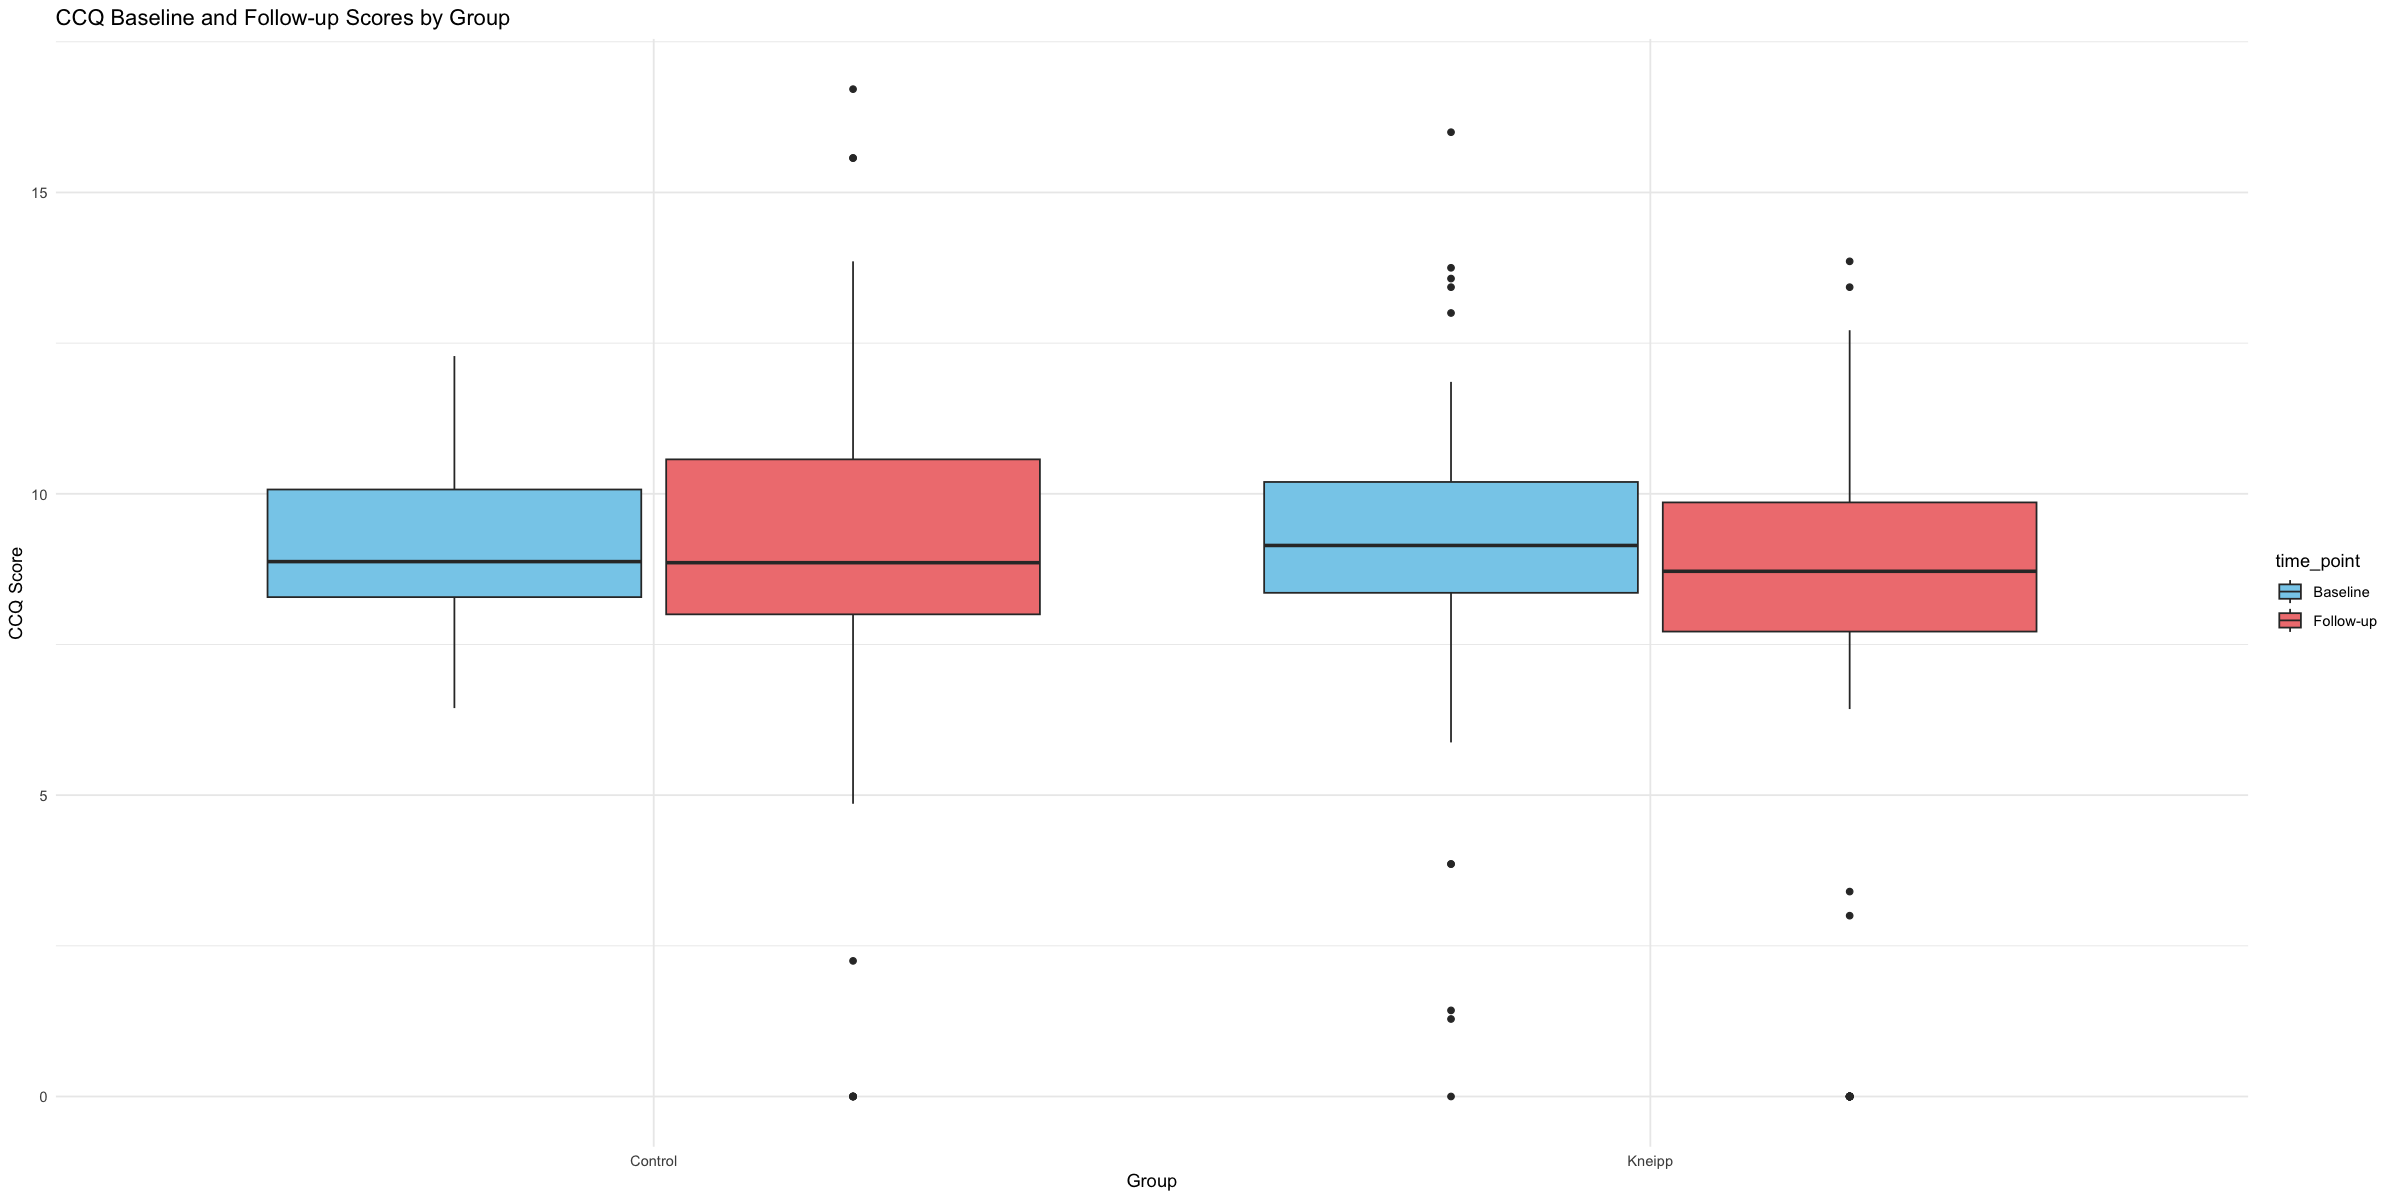

In [76]:
# Reshape the data to long format to include both baseline and follow-up scores
ccq_long <- secondary_outcomes_data %>%
  filter(group %in% c("Control", "Kneipp")) %>%
  select(group, CCQ_baseline_score, CCQ_followup_score) %>%
  pivot_longer(cols = c(CCQ_baseline_score, CCQ_followup_score), 
               names_to = "time_point", values_to = "score")

# Create a new variable to differentiate between baseline and follow-up
ccq_long$time_point <- recode(ccq_long$time_point,
                              "CCQ_baseline_score" = "Baseline",
                              "CCQ_followup_score" = "Follow-up")

# Plot the boxplots with group on x-axis and time point as a grouping variable
ggplot(ccq_long, aes(x = group, y = score, fill = time_point)) +
  geom_boxplot(na.rm = TRUE, position = position_dodge(0.8)) +  # Dodge to separate time points
  labs(title = "CCQ Baseline and Follow-up Scores by Group", 
       x = "Group", 
       y = "CCQ Score") +
  scale_fill_manual(values = c("Baseline" = "skyblue", "Follow-up" = "lightcoral")) +  # Optional color adjustment
  theme_minimal() +
  theme(legend.position = "right")  # Keep the legend for time point identification

# Define the path to save the plot
save_path <- file.path(path, "graphs/ccq_baseline_followup_plot.png")
ggsave(filename = save_path, plot = last_plot(), width = 8, height = 6, dpi = 300)

The boxplot visualizes the comparison of baseline and follow-up CCQ scores across the Control and Kneipp groups. For the Control group, the baseline scores are centered around a median of 10, with a few outliers below 5. The follow-up scores show a slight upward shift, with the median remaining close to 10 but with a broader range of scores and additional outliers on the higher end. This suggests only a minor increase in CCQ scores after the follow-up in the Control group.

In the Kneipp group, the baseline scores are also centered around 9-10, similar to the Control group. The follow-up scores in this group display more variability, indicating some individual differences in response to the intervention. Despite this variability, the median CCQ score remains consistent between baseline and follow-up, with a few lower outliers present at both time points.

Overall, both the Control and Kneipp groups exhibit relatively stable CCQ score distributions between baseline and follow-up. While the Kneipp group shows slightly more variation in follow-up scores, the median scores for both groups remain similar across both time points, indicating no dramatic changes in CCQ scores over time for either group.

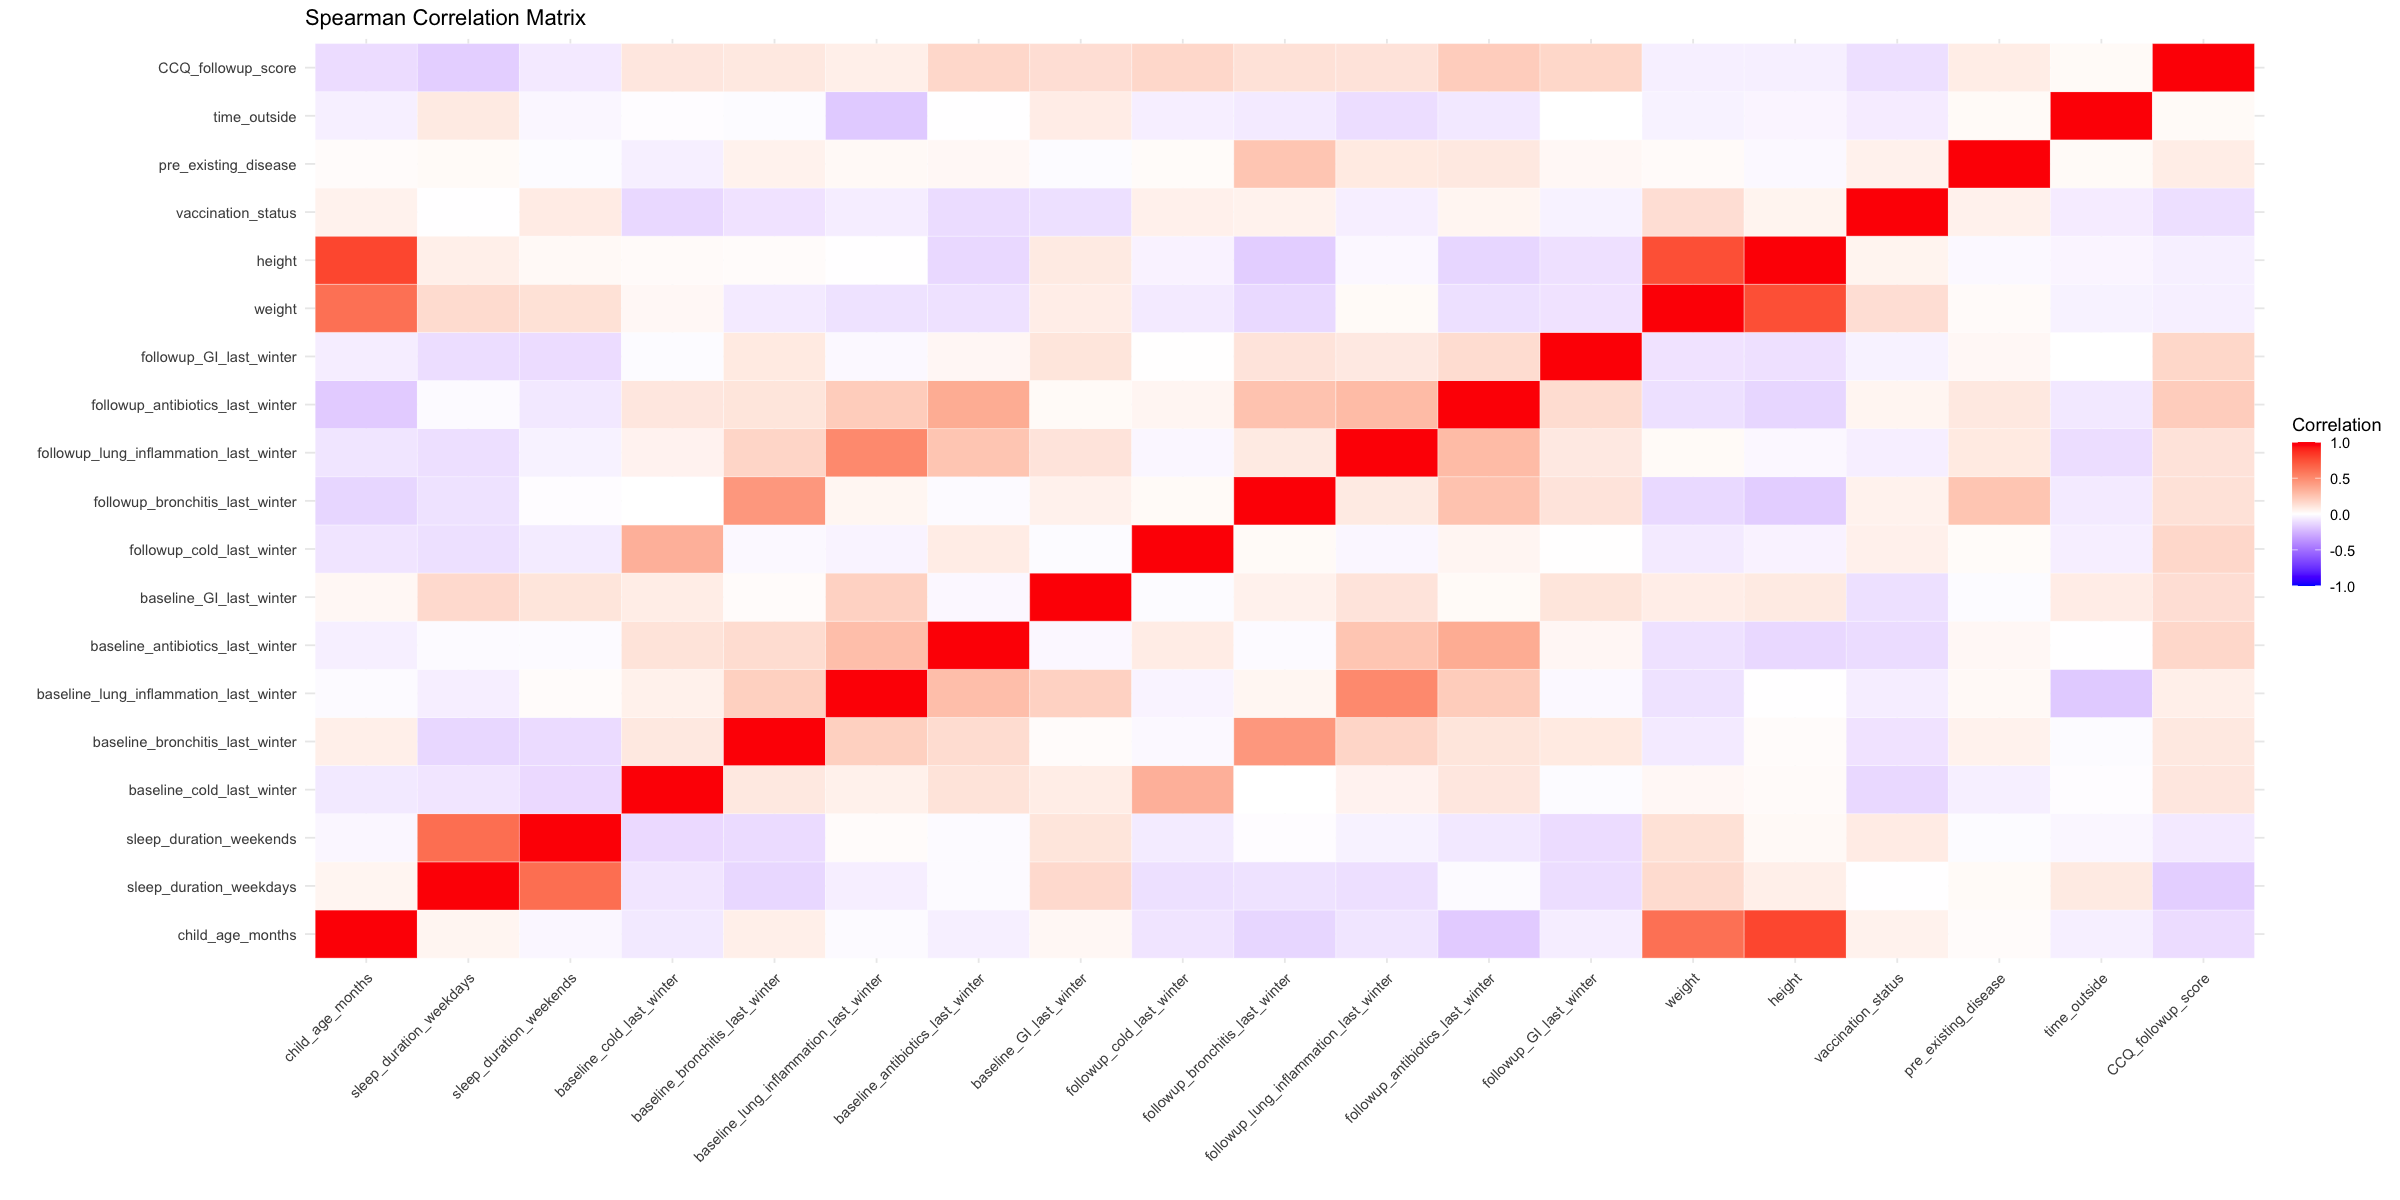

In [77]:
# Include all relevant variables for the correlation analysis
correlation_data <- secondary_outcomes_data %>%
  filter(group %in% c("Control", "Kneipp")) %>%
  select(child_age_months, sleep_duration_weekdays, sleep_duration_weekends,
         baseline_cold_last_winter, baseline_bronchitis_last_winter, baseline_lung_inflammation_last_winter, 
         baseline_antibiotics_last_winter, baseline_GI_last_winter, 
         followup_cold_last_winter, followup_bronchitis_last_winter, followup_lung_inflammation_last_winter,
         followup_antibiotics_last_winter, followup_GI_last_winter, weight, height, vaccination_status, 
         pre_existing_disease, time_outside, CCQ_followup_score)

# Compute the Spearman correlation matrix
correlation_matrix <- cor(correlation_data, use = "pairwise.complete.obs", method = "spearman")

# Convert to a format suitable for ggplot2
correlation_melted <- reshape2::melt(correlation_matrix)

# Visualize the correlation matrix
ggplot(correlation_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
  labs(title = "Spearman Correlation Matrix", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The Spearman correlation matrix shown above provides an overview of the relationships between various variables in the dataset, ranging from baseline and follow-up health outcomes to demographic and health-related characteristics. Spearman correlation is used here to capture monotonic relationships between variables, making it well-suited for both ordinal and continuous data.

We can observe that some variables exhibit stronger correlations with each other, represented by the deep red color, indicating a correlation close to 1. For instance, weight and height have a relatively high positive correlation, which is expected as taller children generally weigh more. Similarly, variables within the same domain, such as "baseline_cold_last_winter" and "followup_cold_last_winter," show moderate correlations, signifying that baseline and follow-up conditions may be related in some cases.

The CCQ_followup_score appears to have low to moderate correlations with other variables, indicating that the follow-up score for common cold symptoms does not strongly correlate with most other baseline or follow-up health indicators. This suggests that CCQ follow-up scores are not heavily influenced by other health conditions or demographic factors, such as time spent outside or vaccination status, within this dataset.

In terms of individual health conditions, we see moderate correlations between baseline and follow-up outcomes, especially between cold-related symptoms, lung inflammation, and bronchitis. This indicates that children who had baseline conditions were likely to have similar issues during the follow-up period.

In summary, this matrix highlights key relationships in the data, such as the link between physical attributes (height and weight) and related health outcomes (baseline and follow-up symptoms), providing insights into the potential predictors and associations within the dataset.

In [ ]:
# List of baseline and follow-up variables
baseline_vars <- c("baseline_cold_last_winter", "baseline_bronchitis_last_winter", "baseline_lung_inflammation_last_winter", "baseline_antibiotics_last_winter", "baseline_GI_last_winter")
followup_vars <- c("followup_cold_last_winter", "followup_bronchitis_last_winter", "followup_lung_inflammation_last_winter", "followup_antibiotics_last_winter", "followup_GI_last_winter")


The five visualizations present the distributions of various baseline and follow-up health indicators (such as colds, bronchitis, lung inflammation, antibiotic use, and gastrointestinal issues) for children in the Control and Kneipp groups. The structure of these visualizations follows a consistent pattern for each variable, displaying the baseline distribution on the left and the follow-up distribution on the right.

1. Baseline vs. Follow-up Cold Last Winter: The first visualization compares the incidence of colds during the previous winter (baseline) to the follow-up period after the intervention. The Control group starts with a significantly higher incidence of colds compared to the Kneipp group at baseline. In the follow-up, both groups show a shift with the Kneipp group catching up, but the Control group remains higher in terms of cold incidence.

2. Baseline vs. Follow-up Bronchitis Last Winter: This second visualization reveals that bronchitis was more prevalent in the Control group during the baseline period. In the follow-up, the Control group still shows a higher frequency of bronchitis compared to the Kneipp group, but the gap narrows, indicating some potential improvement.

3. Baseline vs. Follow-up Lung Inflammation Last Winter: The baseline lung inflammation shows a larger portion of the Control group affected compared to the Kneipp group. In the follow-up, while the overall levels remain low, the Kneipp group still appears to have a lower incidence, similar to baseline.

4. Baseline vs. Follow-up Antibiotic Use Last Winter: This plot shows that antibiotic use during the baseline period was higher for the Control group. By the follow-up period, the difference becomes even more pronounced, with a marked increase in antibiotic use in the Control group, while the Kneipp group remains relatively low.

5. Baseline vs. Follow-up Gastrointestinal Issues (GI) Last Winter: In the baseline period, both groups show similar distributions of gastrointestinal issues. However, in the follow-up period, the Control group exhibits a notable increase in the incidence of GI issues, while the Kneipp group remains more balanced, suggesting a protective effect from the intervention.


Overall, these visualizations highlight that while the Control group consistently starts with higher health issues across these conditions, the Kneipp group shows smaller increases or stabilizes in most cases, particularly in the follow-up periods. These findings suggest the Kneipp intervention might have beneficial effects on children's health outcomes, particularly in reducing respiratory and gastrointestinal issues over time.

## Modeling
[Back to Table of Content](#table-of-content)

In [133]:
# Function to fit and summarize models for each outcome and sex, with recoding checks
fit_model <- function(outcome, baseline, sex_filter, data, is_numeric = FALSE) {
  # Ensure sex_filter is either "1" for males or "2" for females
  filtered_data <- data %>%
    filter(sex == sex_filter & group %in% c("Control", "Kneipp"))  # Only keep relevant groups
  
  if (!is_numeric) {
    # Recode the outcome, baseline, and group variables to 0/1 for dichotomous outcomes
    filtered_data <- filtered_data %>%
      mutate(across(all_of(outcome), ~ ifelse(. == 2, 1, 0)),  # Recode 2 -> 1 and 1 -> 0 for binary variables
             across(all_of(baseline), ~ ifelse(. == 2, 1, 0))) %>%  # Recode 2 -> 1 and 1 -> 0 for binary baseline
      mutate(group = ifelse(group == "Kneipp", 1, 0))  # Recode "Kneipp" -> 1 and "Control" -> 0
    
    # Check the recoded values to ensure they are correct
    print(paste("Checking values for", outcome, "after recoding:"))
    print(table(filtered_data[[outcome]]))  # Should only show 0 and 1 now
    print(paste("Checking values for", baseline, "after recoding:"))
    print(table(filtered_data[[baseline]]))  # Should only show 0 and 1 now
  }
  
  # Proceed with model fitting
  if (is_numeric) {
    # Use lmer for continuous numeric outcomes (like CCQ_followup_score)
    model <- lmer(as.formula(paste(outcome, "~ group +", baseline, "+ (1 | pairs) + (1 | kindergarten_ID)")),
                  data = filtered_data)
  } else {
    # Use glmer for dichotomous outcomes
    model <- glmer(as.formula(paste(outcome, "~ group +", baseline, "+ (1 | pairs) + (1 | kindergarten_ID)")),
                   data = filtered_data, family = binomial)
  }
  
  # Display summary and confidence intervals with Wald method for both model types
  print(summary(model))
  print(confint(model, method = "Wald"))
  
  return(model)
}

In [135]:
# List of dichotomous outcomes and their corresponding baselines
dichotomous_outcomes <- c("followup_cold_last_winter", "followup_bronchitis_last_winter", 
                          "followup_lung_inflammation_last_winter", "followup_antibiotics_last_winter", 
                          "followup_GI_last_winter")

dichotomous_baselines <- c("baseline_cold_last_winter", "baseline_bronchitis_last_winter", 
                           "baseline_lung_inflammation_last_winter", "baseline_antibiotics_last_winter", 
                           "baseline_GI_last_winter")

In [136]:
# Continuous outcome (CCQ follow-up score)
continuous_outcome <- "CCQ_followup_score"
continuous_baseline <- "CCQ_baseline_score"

In [137]:
# Call the function for males (coded as "1") and females (coded as "2")
male_model <- fit_model("followup_cold_last_winter", "baseline_cold_last_winter", "1", secondary_outcomes_data, is_numeric = FALSE)
female_model <- fit_model("followup_cold_last_winter", "baseline_cold_last_winter", "2", secondary_outcomes_data, is_numeric = FALSE)

[1] "Checking values for followup_cold_last_winter after recoding:"

 1  2 
16 98 
[1] "Checking values for baseline_cold_last_winter after recoding:"

 1  2 
 8 73 


ERROR: Error in eval(family$initialize, rho): y values must be 0 <= y <= 1


CCQ

In [108]:
# Model for Male participants
male_model <- lmer(CCQ_followup_score ~ group + CCQ_baseline_score + (1 | pairs) + (1 | kindergarten_ID),
                   data = secondary_outcomes_data %>% filter(sex == "1"))

# Model for Female participants
female_model <- lmer(CCQ_followup_score ~ group + CCQ_baseline_score + (1 | pairs) + (1 | kindergarten_ID),
                     data = secondary_outcomes_data %>% filter(sex == "2"))


boundary (singular) fit: see help('isSingular')



In [109]:
# Step 2: Summary of the models
cat("Results for Male participants:\n")
summary(male_model)

# Confidence Intervals for Male Model
confint(male_model, level = 0.95)

Results for Male participants:


Linear mixed model fit by REML ['lmerMod']
Formula: CCQ_followup_score ~ group + CCQ_baseline_score + (1 | pairs) +  
    (1 | kindergarten_ID)
   Data: secondary_outcomes_data %>% filter(sex == "1")

REML criterion at convergence: 355.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3635 -0.4476 -0.0340  0.5156  3.3343 

Random effects:
 Groups          Name        Variance Std.Dev.
 kindergarten_ID (Intercept) 0.000    0.000   
 pairs           (Intercept) 0.000    0.000   
 Residual                    4.462    2.112   
Number of obs: 82, groups:  kindergarten_ID, 9; pairs, 4

Fixed effects:
                   Estimate Std. Error t value
(Intercept)          2.4675     1.2817   1.925
groupKneipp         -0.7986     0.4687  -1.704
CCQ_baseline_score   0.7714     0.1359   5.676

Correlation of Fixed Effects:
            (Intr) grpKnp
groupKneipp -0.108       
CCQ_bsln_sc -0.969 -0.063
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isS

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.6422715
.sig02,0.00000000,0.6646955
.sigma,1.79235054,2.4361506
(Intercept),-0.02736999,4.9624083
groupKneipp,-1.71091274,0.1205583
CCQ_baseline_score,0.50684638,1.0359010


In [ ]:
cat("\n\nResults for Female participants:\n")
summary(female_model)

# Confidence Intervals for Female Model
confint(female_model, level = 0.95)

COLD

In [ ]:
# Model for followup_cold_last_winter by sex
cold_male_model <- lmer(followup_cold_last_winter ~ group + baseline_cold_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                        data = secondary_outcomes_data %>% filter(sex == "1"))

cold_female_model <- lmer(followup_cold_last_winter ~ group + baseline_cold_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                          data = secondary_outcomes_data %>% filter(sex == "2"))


In [ ]:
summary(cold_male_model)
confint(cold_male_model)


In [ ]:
summary(cold_female_model)
confint(cold_female_model)

In [ ]:
# For Kneipp group
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(followup_cold_last_winter, na.rm = TRUE),
    sd_CCQ = sd(followup_cold_last_winter, na.rm = TRUE),
    min_CCQ = min(followup_cold_last_winter, na.rm = TRUE),
    max_CCQ = max(followup_cold_last_winter, na.rm = TRUE)
  )

# Display the result
print(kneipp_stats)

BRONCHITIS

In [ ]:
# Model for followup_bronchitis_last_winter by sex
bronchitis_male_model <- lmer(followup_bronchitis_last_winter ~ group + baseline_bronchitis_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                              data = secondary_outcomes_data %>% filter(sex == "1"))

bronchitis_female_model <- lmer(followup_bronchitis_last_winter ~ group + baseline_bronchitis_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                                data = secondary_outcomes_data %>% filter(sex == "2"))


In [ ]:
summary(bronchitis_male_model)
confint(bronchitis_male_model)


In [ ]:
summary(bronchitis_female_model)
confint(bronchitis_female_model, method = "Wald")

In [ ]:
# For Kneipp group
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(followup_bronchitis_last_winter, na.rm = TRUE),
    sd_CCQ = sd(followup_bronchitis_last_winter, na.rm = TRUE),
    min_CCQ = min(followup_bronchitis_last_winter, na.rm = TRUE),
    max_CCQ = max(followup_bronchitis_last_winter, na.rm = TRUE)
  )

# Display the result
print(kneipp_stats)

LUNG INFLAMMATION

In [ ]:
# Model for followup_lung_inflammation_last_winter by sex
lung_inflammation_male_model <- lmer(followup_lung_inflammation_last_winter ~ group + baseline_lung_inflammation_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                                     data = secondary_outcomes_data %>% filter(sex == "1"))

lung_inflammation_female_model <- lmer(followup_lung_inflammation_last_winter ~ group + baseline_lung_inflammation_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                                       data = secondary_outcomes_data %>% filter(sex == "2"))


In [ ]:
summary(lung_inflammation_male_model)
confint(lung_inflammation_male_model, method = "Wald")

In [ ]:
summary(lung_inflammation_female_model)
confint(lung_inflammation_female_model, method = "Wald")

In [ ]:
# For Kneipp group
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(followup_lung_inflammation_last_winter, na.rm = TRUE),
    sd_CCQ = sd(followup_lung_inflammation_last_winter, na.rm = TRUE),
    min_CCQ = min(followup_lung_inflammation_last_winter, na.rm = TRUE),
    max_CCQ = max(followup_lung_inflammation_last_winter, na.rm = TRUE)
  )

# Display the result
print(kneipp_stats)

Antibiotics

In [ ]:
# Model for followup_antibiotics_last_winter by sex
antibiotics_male_model <- lmer(followup_antibiotics_last_winter ~ group + baseline_antibiotics_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                               data = secondary_outcomes_data %>% filter(sex == "1"))

antibiotics_female_model <- lmer(followup_antibiotics_last_winter ~ group + baseline_antibiotics_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                                 data = secondary_outcomes_data %>% filter(sex == "2"))


In [ ]:
summary(antibiotics_male_model)
confint(antibiotics_male_model, method = "Wald")

In [ ]:
summary(antibiotics_female_model)
confint(antibiotics_female_model, method = "Wald")

In [ ]:
# For Kneipp group
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(followup_antibiotics_last_winter, na.rm = TRUE),
    sd_CCQ = sd(followup_antibiotics_last_winter, na.rm = TRUE),
    min_CCQ = min(followup_antibiotics_last_winter, na.rm = TRUE),
    max_CCQ = max(followup_antibiotics_last_winter, na.rm = TRUE)
  )

# Display the result
print(kneipp_stats)

GI

In [ ]:
# Model for followup_GI_last_winter by sex
GI_male_model <- lmer(followup_GI_last_winter ~ group + baseline_GI_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                      data = secondary_outcomes_data %>% filter(sex == "1"))

GI_female_model <- lmer(followup_GI_last_winter ~ group + baseline_GI_last_winter + (1 | pairs) + (1 | kindergarten_ID),
                        data = secondary_outcomes_data %>% filter(sex == "2"))

In [ ]:
summary(GI_male_model)
confint(GI_male_model, method = "Wald")

In [ ]:
summary(GI_female_model)
confint(GI_female_model, method = "Wald")

In [ ]:
# For Kneipp group
kneipp_stats <- secondary_outcomes_data %>%
  dplyr::group_by(group, sex) %>%
  dplyr::summarise(
    n = n(),
    mean_CCQ = mean(followup_GI_last_winter, na.rm = TRUE),
    sd_CCQ = sd(followup_GI_last_winter, na.rm = TRUE),
    min_CCQ = min(followup_GI_last_winter, na.rm = TRUE),
    max_CCQ = max(followup_GI_last_winter, na.rm = TRUE)
  )

# Display the result
print(kneipp_stats)

PP

# BASELINE CHAR ITT


In [ ]:
head(secondary_outcomes_data)

In [ ]:
colnames(secondary_outcomes_data)

In [63]:
# Filter for baseline time points (V0 and V0-2), and exclude groups that are not Control or Kneipp
baseline_data <- secondary_outcomes_data %>%
  filter(questionnaire_time_point %in% c("V0", "V0-2") & group %in% c("Control", "Kneipp") & sex %in% c("1", "2"))

In [64]:
# Summary table for numeric values
baseline_summary_numeric <- baseline_data %>%
  dplyr::group_by(group) %>%
  dplyr::summarise(
    group = first(group),  # Ensure 'group' column is preserved
    # Sex distribution
    Male = sum(sex == 1, na.rm = TRUE),
    Female = sum(sex == 2, na.rm = TRUE),
    Other = sum(sex == 3, na.rm = TRUE),
    Total_Sex = n(),

    # Age in months
    Age_Mean = mean(child_age_months, na.rm = TRUE),
    Age_SD = sd(child_age_months, na.rm = TRUE),

    # Acclimatization to kindergarten in months
    Acclimatization_Mean = mean(acclimatization * 12, na.rm = TRUE),
    Acclimatization_SD = sd(acclimatization * 12, na.rm = TRUE),

    # Weight (kg)
    Weight_Mean = mean(weight, na.rm = TRUE),
    Weight_SD = sd(weight, na.rm = TRUE),

    # Height (cm)
    Height_Mean = mean(height, na.rm = TRUE),
    Height_SD = sd(height, na.rm = TRUE),

    # Sleep duration (hours)
    Sleep_Weekdays_Mean = mean(sleep_duration_weekdays, na.rm = TRUE),
    Sleep_Weekdays_SD = sd(sleep_duration_weekdays, na.rm = TRUE),
    
    Sleep_Weekends_Mean = mean(sleep_duration_weekends, na.rm = TRUE),
    Sleep_Weekends_SD = sd(sleep_duration_weekends, na.rm = TRUE),

    # Adults and children in household
    Adults_Mean = mean(number_adults, na.rm = TRUE),
    Adults_SD = sd(number_adults, na.rm = TRUE),

    Children_Mean = mean(number_minors, na.rm = TRUE),
    Children_SD = sd(number_minors, na.rm = TRUE),

    # Age of oldest and youngest child
    Oldest_Child_Age_Mean = mean(age_oldest, na.rm = TRUE),
    Oldest_Child_Age_SD = sd(age_oldest, na.rm = TRUE),
    
    Youngest_Child_Age_Mean = mean(age_youngest, na.rm = TRUE),
    Youngest_Child_Age_SD = sd(age_youngest, na.rm = TRUE)
  )

In [65]:
# Summary table for character values
baseline_summary_character <- baseline_data %>%
  dplyr::group_by(group) %>%
  dplyr::summarise(
    group = first(group),  # Ensure 'group' column is preserved
    # Age range (character values)
    Age_Range = paste0(range(child_age_months, na.rm = TRUE), collapse = " - "),
    
    # Acclimatization range (converting from years to months)
    Acclimatization_Range = paste0(range(acclimatization * 12, na.rm = TRUE), collapse = " - "),
    
    # Weight range
    Weight_Range = paste0(range(weight, na.rm = TRUE), collapse = " - "),
    
    # Height range
    Height_Range = paste0(range(height, na.rm = TRUE), collapse = " - "),

    # Sleep Weekdays
    Sleep_Weekdays_Range = paste0(range(sleep_duration_weekdays, na.rm = TRUE), collapse = " - "),

    Sleep_Weekends_Range = paste0(range(sleep_duration_weekends, na.rm = TRUE), collapse = " - "),

    # number of adults
    Adults_Range = paste0(range(number_adults, na.rm = TRUE), collapse = " - "),

    # number of minors
    Children_Range = paste0(range(number_minors, na.rm = TRUE), collapse = " - "),

    # oldest and youngest child
    Oldest_Child_Age_Range = paste0(range(age_oldest, na.rm = TRUE), collapse = " - "),
    Youngest_Child_Age_Range = paste0(range(age_youngest, na.rm = TRUE), collapse = " - ")
  )

In [66]:
# Summary table for categorical values (including percentages)
baseline_summary_categorical <- baseline_data %>%
  dplyr::group_by(group) %>%
  dplyr::summarise(
    group = first(group),  # Ensure 'group' column is preserved
    # Vaccination status
    All_STIKO = sum(vaccination_status == 1, na.rm = TRUE),
    Some_STIKO = sum(vaccination_status == 2, na.rm = TRUE),
    Not_Vaccinated = sum(vaccination_status == 3, na.rm = TRUE),

    # Previous illnesses
    Previous_Illness_Yes = sum(pre_existing_disease == 2, na.rm = TRUE),
    Previous_Illness_No = sum(pre_existing_disease == 1, na.rm = TRUE),

    # Chronic illnesses
    Chronic_Illness_Yes = sum(chronic_disease == 2, na.rm = TRUE),
    Chronic_Illness_No = sum(chronic_disease == 1, na.rm = TRUE),

    # Time spent outdoors
    Outdoors_30min = sum(time_outside == 1, na.rm = TRUE),
    Outdoors_30_60min = sum(time_outside == 2, na.rm = TRUE),
    Outdoors_60_90min = sum(time_outside == 3, na.rm = TRUE),
    Outdoors_90min = sum(time_outside == 4, na.rm = TRUE),

    # Attending sport/club
    Sport_Yes = sum(sport_and_club == 2, na.rm = TRUE),
    Sport_No = sum(sport_and_club == 1, na.rm = TRUE),

    # Marital status
    Married = sum(family_status == 1, na.rm = TRUE),
    Cohabiting = sum(family_status == 2, na.rm = TRUE),
    Single_Parent = sum(family_status == 3, na.rm = TRUE),
    Separated_Divorced = sum(family_status == 4, na.rm = TRUE),
    Widowed = sum(family_status == 5, na.rm = TRUE),
    Patchwork_Families = sum(family_status == 6, na.rm = TRUE),

    # Education for Parent 1
    Parent1_Secondary = sum(education_parent1 == 2, na.rm = TRUE),
    Parent1_University_Entrance = sum(education_parent1 == 3, na.rm = TRUE),
    Parent1_Vocational = sum(education_parent1 == 4, na.rm = TRUE),
    Parent1_University = sum(education_parent1 == 5, na.rm = TRUE),
    Parent1_No_Qualification = sum(education_parent1 == 1, na.rm = TRUE),

    # Education for Parent 2
    Parent2_Secondary = sum(education_parent2 == 2, na.rm = TRUE),
    Parent2_University_Entrance = sum(education_parent2 == 3, na.rm = TRUE),
    Parent2_Vocational = sum(education_parent2 == 4, na.rm = TRUE),
    Parent2_University = sum(education_parent2 == 5, na.rm = TRUE),
    Parent2_No_Qualification = sum(education_parent2 == 1, na.rm = TRUE),

    # Employment for Parent 1
    Parent1_Pupil = sum(occupation_parent1 == 1, na.rm = TRUE),
    Parent1_Training = sum(occupation_parent1 == 2, na.rm = TRUE),
    Parent1_Student = sum(occupation_parent1 == 3, na.rm = TRUE),
    Parent1_Employee = sum(occupation_parent1 == 4, na.rm = TRUE),
    Parent1_Civil_Servant = sum(occupation_parent1 == 5, na.rm = TRUE),
    Parent1_Self_Employed = sum(occupation_parent1 == 6, na.rm = TRUE),
    Parent1_Unemployed = sum(occupation_parent1 == 7, na.rm = TRUE),
    Parent1_Other = sum(occupation_parent1 == 8, na.rm = TRUE),

    # Employment for Parent 2
    Parent2_Pupil = sum(occupation_parent2 == 1, na.rm = TRUE),
    Parent2_Training = sum(occupation_parent2 == 2, na.rm = TRUE),
    Parent2_Student = sum(occupation_parent2 == 3, na.rm = TRUE),
    Parent2_Employee = sum(occupation_parent2 == 4, na.rm = TRUE),
    Parent2_Civil_Servant = sum(occupation_parent2 == 5, na.rm = TRUE),
    Parent2_Self_Employed = sum(occupation_parent2 == 6, na.rm = TRUE),
    Parent2_Unemployed = sum(occupation_parent2 == 7, na.rm = TRUE),
    Parent2_Other = sum(occupation_parent2 == 8, na.rm = TRUE),

    # Household income
    Income_Less_Than_499 = sum(household_income == 2, na.rm = TRUE),
    Income_500_999 = sum(household_income == 4, na.rm = TRUE),
    Income_1000_1499 = sum(household_income == 5, na.rm = TRUE),
    Income_1500_1999 = sum(household_income == 6, na.rm = TRUE),
    Income_2000_2499 = sum(household_income == 7, na.rm = TRUE),
    Income_2500_2999 = sum(household_income == 8, na.rm = TRUE),
    Income_3000_3499 = sum(household_income == 9, na.rm = TRUE),
    Income_3500_3999 = sum(household_income == 10, na.rm = TRUE),
    Income_4000_And_More = sum(household_income == 11, na.rm = TRUE)
  )

In [67]:
# Pivot the numeric summary data to be vertical
baseline_summary_numeric_long <- baseline_summary_numeric %>%
  tidyr::pivot_longer(cols = -group, names_to = "Variable", values_to = "Value")


In [68]:
# Pivot the character summary data to be vertical
baseline_summary_character_long <- baseline_summary_character %>%
  tidyr::pivot_longer(cols = -group, names_to = "Variable", values_to = "Value")


In [69]:
# Pivot the categorical summary data to be vertical
baseline_summary_categorical_long <- baseline_summary_categorical %>%
  tidyr::pivot_longer(cols = -group, names_to = "Variable", values_to = "Value")


In [ ]:
# Print the numeric summary
cat("Numeric Summary:\n")
print(baseline_summary_numeric_long, n = Inf)

In [ ]:
# Print the character summary
cat("\nCharacter Summary:\n")
print(baseline_summary_character_long, n = Inf)

In [ ]:
# Print the categorical summary
cat("\nCategorical Summary:\n")
print(baseline_summary_categorical_long, n = Inf)